# Canada Immigration - Data Visualization

The primary objective is to delve into an Immigration Dataset that contains data regarding migration patterns to and from Canada spanning the years 1980 to 2013. The goal is to conduct **data visualization** tasks on several features within the dataset utilising the pre-processed data.

#### Import Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pywaffle import Waffle
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

#### Load the Dataset

In [24]:
df_can = pd.read_csv(r"C:\Users\asifs\Desktop\Data Visualization with Python\Canada.csv")
df_can = df_can.set_index('Country')
df_can = df_can.rename_axis(index = None)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,...,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,...,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,...,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,...,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [25]:
# useful when plotting charts later
years = list(map(str, range(1980, 2014)))

## Data Visualization

#### Continent Proportion

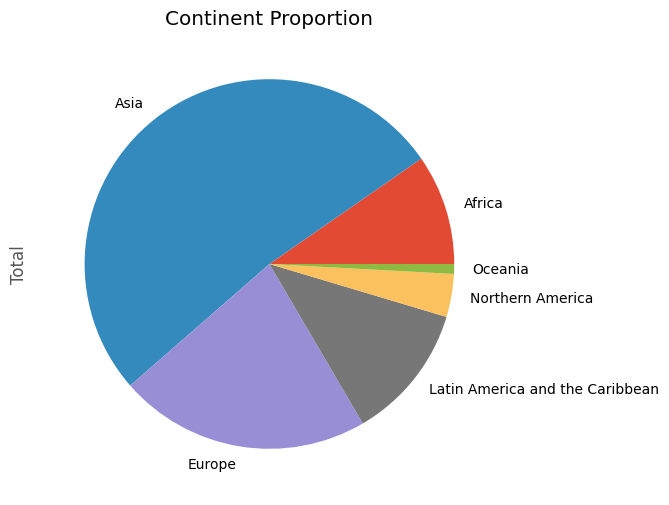

In [26]:
columns_to_drop = ['Region', 'DevName']
df_can = df_can.drop(columns_to_drop, axis = 1)
df_continents = df_can.groupby('Continent').sum()

plt.figure(figsize = (6, 6))
df_continents['Total'].plot(kind = 'pie')
plt.title('Continent Proportion')
plt.show()

#### Number of Immigrations throughout the Years

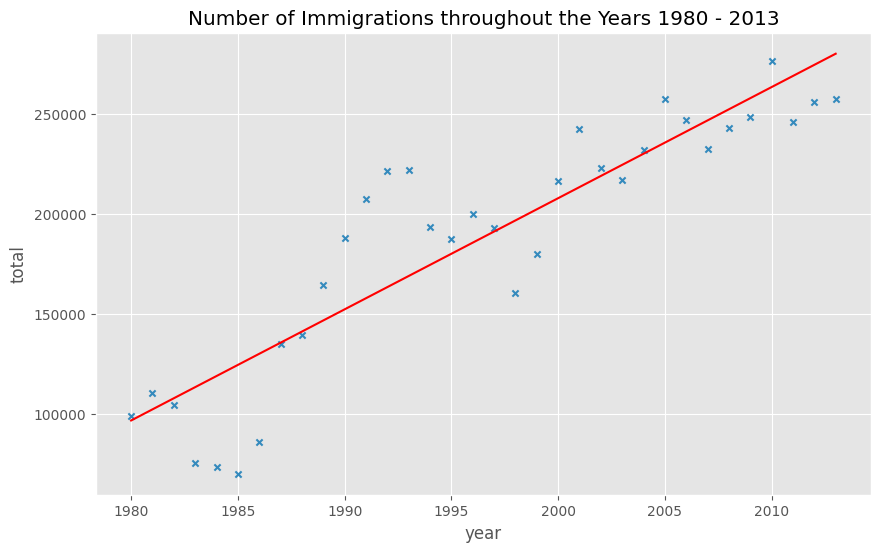

In [78]:
df_tot = pd.DataFrame(df_can[years].sum(axis = 0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']

x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg = 1)
df_tot.plot(kind = 'scatter', x = 'year', y = 'total', figsize = (10, 6), marker = 'x')
plt.plot(x, fit[0] * x + fit[1], color = 'red')
plt.title('Number of Immigrations throughout the Years 1980 - 2013')
plt.show()

#### Immigration from Haiti

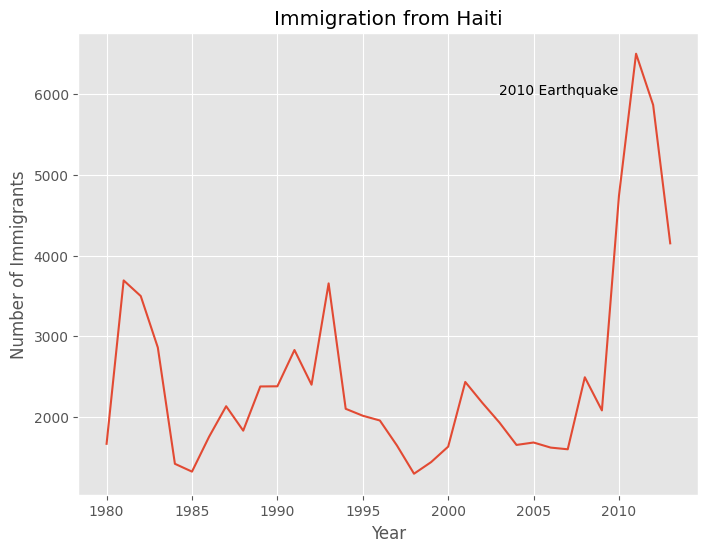

In [9]:
df_H = df_can.loc['Haiti', years]
df_H.plot(kind = 'line', figsize = (8, 6))
plt.title('Immigration from Haiti')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.text(23, 6000, '2010 Earthquake')
plt.show()

#### Immigration from China vs India

In [10]:
pd.set_option('display.max_columns', 35)
df_CI = df_can.loc[['India', 'China'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


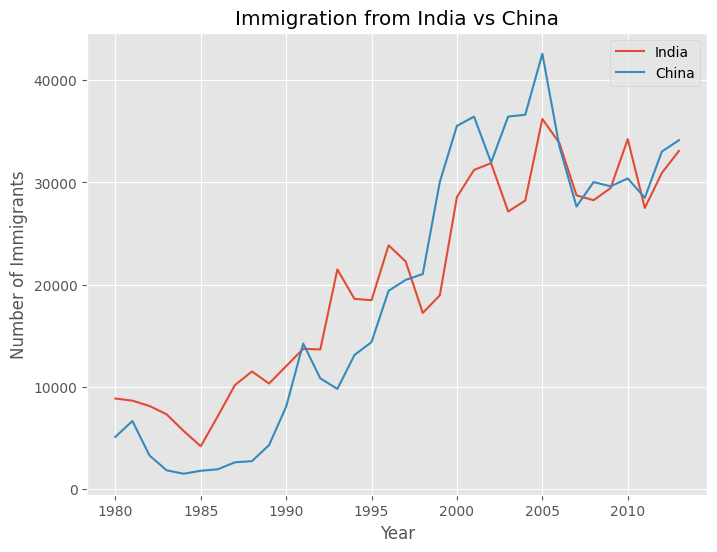

In [11]:
df_CI = df_CI.transpose()
df_CI.plot(kind = 'line', figsize = (8, 6))
plt.title('Immigration from India vs China')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

#### Immigration from Brazil and Argentina from 1980 to 2013

In [73]:
df_new = df_can
# columns_to_drop = ['Continent']
df_new = df_new.drop(['Continent'], axis = 1)
df_new = df_new.transpose()
df_new.reset_index(inplace = True)
df_new.rename(columns = {'index' : 'Year'}, inplace = True)
df_new.drop(34, inplace = True)
df_new = df_new.set_index('Year')
df_new.index = map(int, df_new.index)
df_new = df_new.reset_index()
df_new.rename(columns = {'index' : 'Year'}, inplace = True)

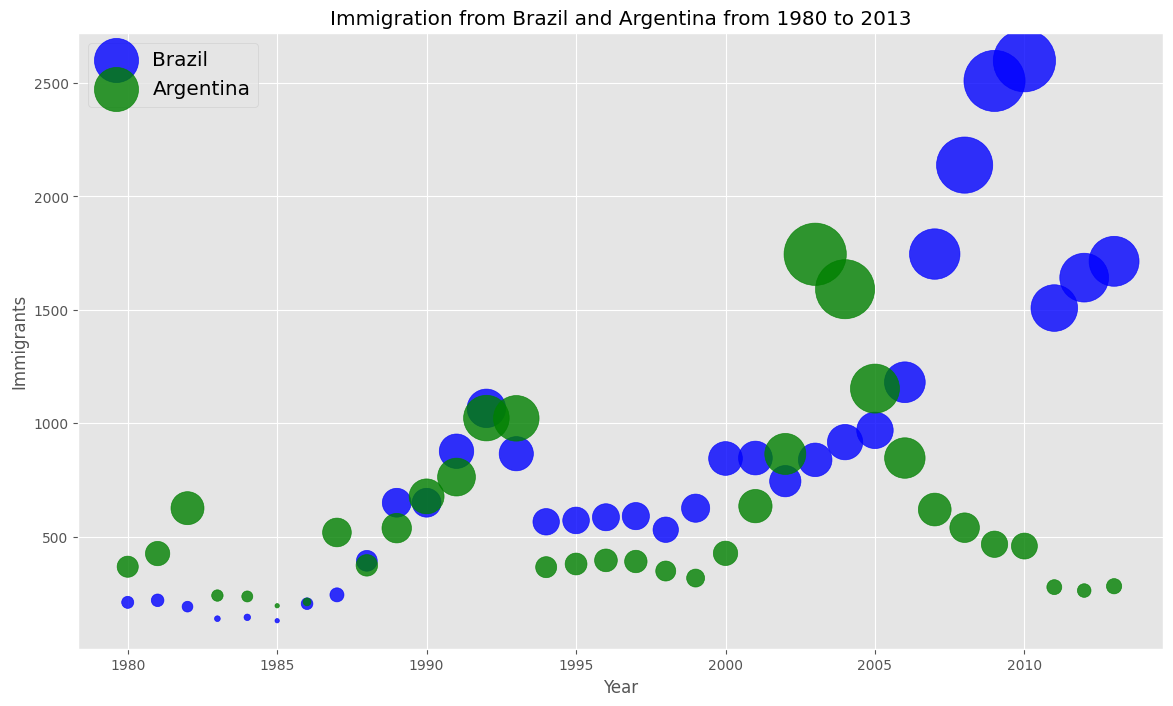

In [75]:
norm_brazil = MinMaxScaler().fit_transform(df_new[['Brazil']])
norm_argentina = MinMaxScaler().fit_transform(df_new[['Argentina']])

ax0 = df_new.plot(kind = 'scatter',
                 x = 'Year',
                 y = 'Brazil',
                 figsize = (14, 8),
                 c = 'blue',
                 alpha = 0.8,
                 s = norm_brazil * 2000 + 10,
                 label = 'Brazil')

ax1 = df_new.plot(kind = 'scatter',
                 x = 'Year',
                 y = 'Argentina',
                 figsize = (14, 8),
                 c = 'green',
                 alpha = 0.8,
                 s = norm_argentina * 2000 + 10,
                 ax = ax0,
                 label = 'Argentina')
plt.legend(loc = 'upper left', fontsize = 'x-large')
plt.ylabel('Immigrants')
plt.title('Immigration from Brazil and Argentina from 1980 to 2013')
plt.show()

#### Distribution of Total Number of Immigrants from Denmark, Norway and Sweden

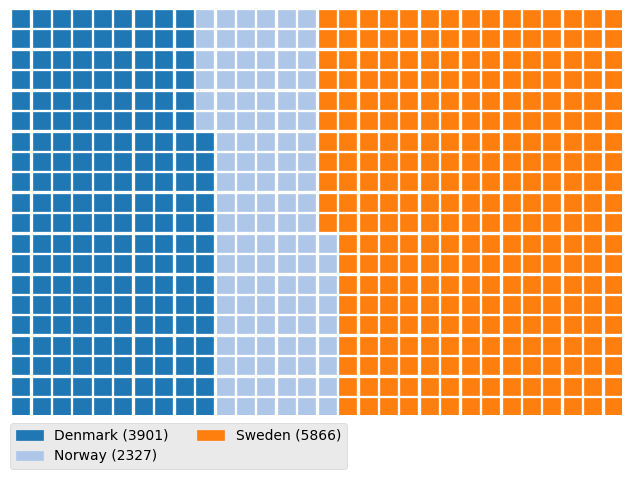

In [77]:
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden']]
df_dns
plt.figure(FigureClass = Waffle,
          rows = 20, columns = 30,
          values = df_dns['Total'],
          cmap_name = 'tab20',
          legend = {'labels' : [f"{k} ({v})" for k, v in zip(df_dns.index.values, df_dns.Total)],
                   'loc' : 'lower left', 'bbox_to_anchor' : (-0.015, -0.15), 'ncol' : 2})
plt.show()

#### Top 5 Countries - Immigration to Canada

In [12]:
df_can.sort_values(by = 'Total', ascending = False, inplace = True)

In [13]:
df_top_pre = df_can.head(5)
df_top = df_top_pre[years]
df_top

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


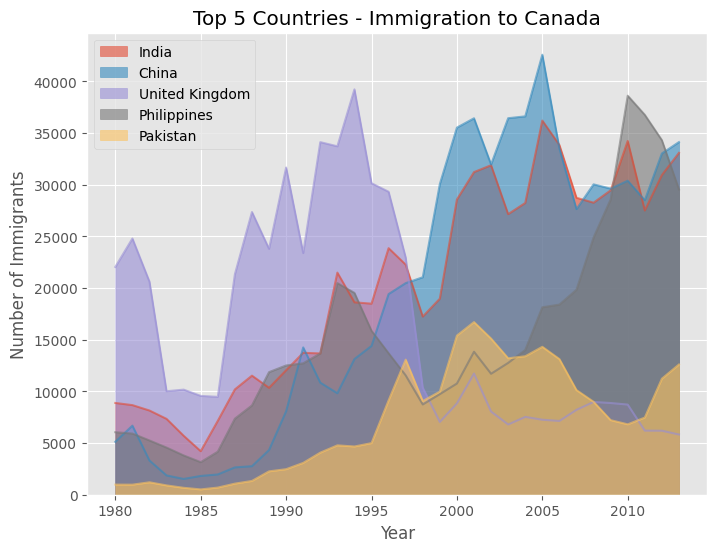

In [14]:
df_top = df_top.transpose()
df_top.index = df_top.index.map(int)
df_top.columns = ['India', 'China', 'United Kingdom', 'Philippines', 'Pakistan']
df_top.plot(kind = 'area', figsize = (8, 6), stacked = False, alpha = 0.6)
plt.title("Top 5 Countries - Immigration to Canada")
plt.xlabel("Year")
plt.ylabel('Number of Immigrants')
plt.show()

#### Number of Immigrants from 1980 - 2013 in Iceland

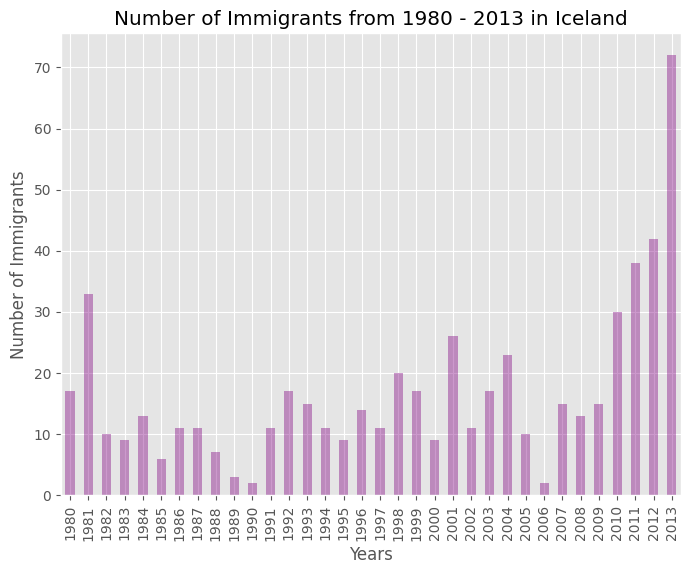

In [15]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot(kind = 'bar', figsize = (8, 6), color = 'purple', alpha = 0.4)

plt.title('Number of Immigrants from 1980 - 2013 in Iceland')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

#### Total Immigrants to Canada from Top 15 Countries between 1980 - 2013

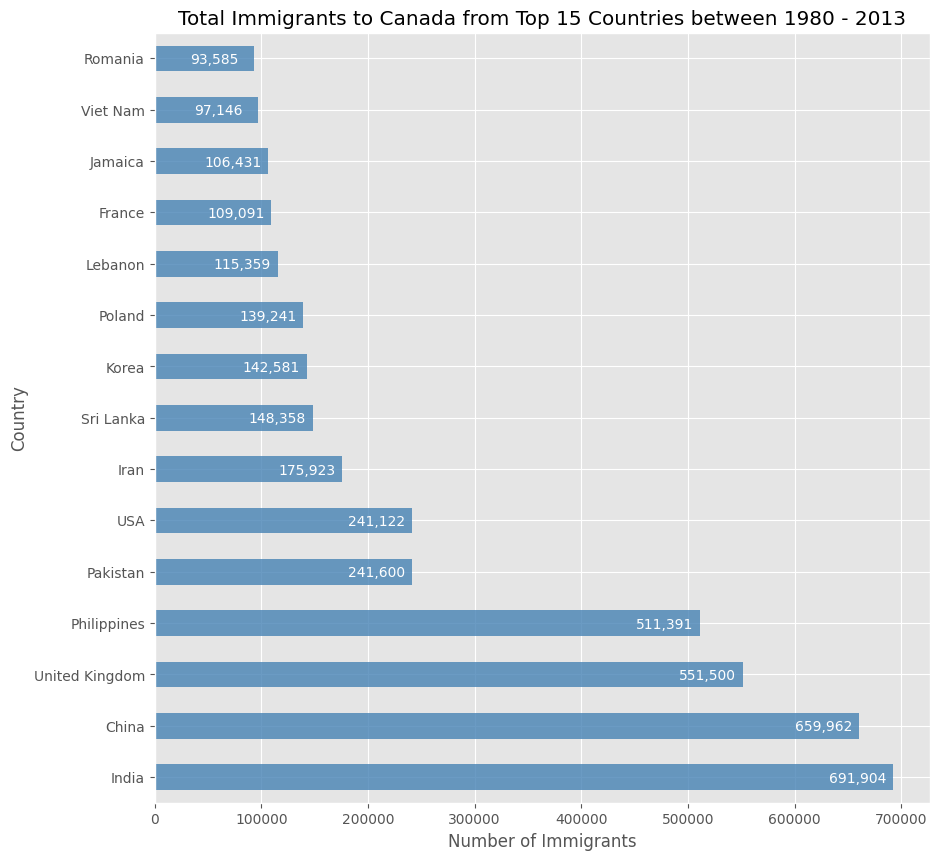

In [16]:
df_top15 = df_can['Total'].head(15)
df_top15 = df_top15.rename(index = {'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom',
                                    'Iran (Islamic Republic of)' : 'Iran', 'United States of America' : 'USA', 
                                    'Republic of Korea' : 'Korea'})
df_top15 = df_top15.transpose()

df_top15.plot(kind = 'barh', figsize = (10, 10), color = 'steelblue', alpha = 0.8)
plt.xlabel('Number of Immigrants')
plt.ylabel('Country')
plt.title('Total Immigrants to Canada from Top 15 Countries between 1980 - 2013')

for index, value in enumerate(df_top15):
    label = format(int(value), ',')
    plt.annotate(label, xy = (value - 60000, index - 0.1), color = 'white')
    
plt.show()